<a href="https://colab.research.google.com/github/Anakha-s/Project-1/blob/main/orgl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
### EDA Pkgs
import pandas as pd

In [45]:
# Data Viz Pkg
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Load Dataset
df = pd.read_csv("covid19_tweets.csv")

In [50]:
# Preview
df.head()

user_name         user_location  ...               source is_retweet
0           ᏉᎥ☻լꂅϮ            astroworld  ...   Twitter for iPhone      False
1    Tom Basile 🇺🇸          New York, NY  ...  Twitter for Android      False
2  Time4fisticuffs      Pewee Valley, KY  ...  Twitter for Android      False
3      ethel mertz  Stuck in the Middle   ...   Twitter for iPhone      False
4         DIPR-J&K     Jammu and Kashmir  ...  Twitter for Android      False

[5 rows x 13 columns]

Task
Text
Text Preprocessing
Sentiment Analysis
Keyword Extraction
Entity Extraction

> Indented block



In [51]:
# Check Columns
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [52]:
# Datatype
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [53]:
# Source/ Value Count/Distribution of the Sources
df['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [54]:
# Source/ Value Count/Distribution of the Sources
df['source'].value_counts()

Twitter Web App                  56891
Twitter for Android              40179
Twitter for iPhone               35472
TweetDeck                         8543
Hootsuite Inc.                    7321
                                 ...  
Fox XRIO 2 News                      1
MavSocial App                        1
TrafficChiefNG                       1
4strat-foresight                     1
TMZ iPhone Social Application        1
Name: source, Length: 610, dtype: int64

In [55]:
# Plot the top value_counts
df['source'].value_counts().nlargest(30)

Twitter Web App            56891
Twitter for Android        40179
Twitter for iPhone         35472
TweetDeck                   8543
Hootsuite Inc.              7321
Twitter for iPad            4336
Buffer                      2728
Sprout Social               1833
Instagram                   1759
IFTTT                       1545
dlvr.it                      681
GlobalPandemic.NET           679
LinkedIn                     628
COVID19-Updates              625
Twitter Media Studio         596
WordPress.com                537
HubSpot                      513
Sprinklr                     497
FS Poster                    414
Dynamic Signal               391
Resistbot Open Letters       390
Cheap Bots, Done Quick!      335
Paper.li                     322
Twitter for Advertisers      317
Blood Donors India           281
IAMBLOG2TWITTER              266
Alexander Higgins            225
Zoho Social                  224
The Social Jukebox           216
Fabrik.fm                    209
Name: sour

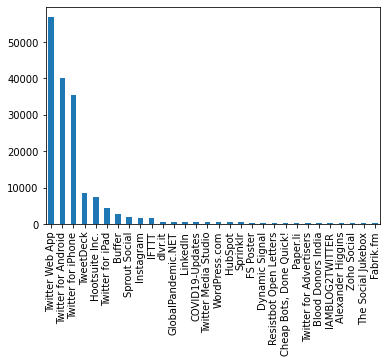

In [56]:
# Plot the top value_counts
df['source'].value_counts().nlargest(30).plot(kind='bar')

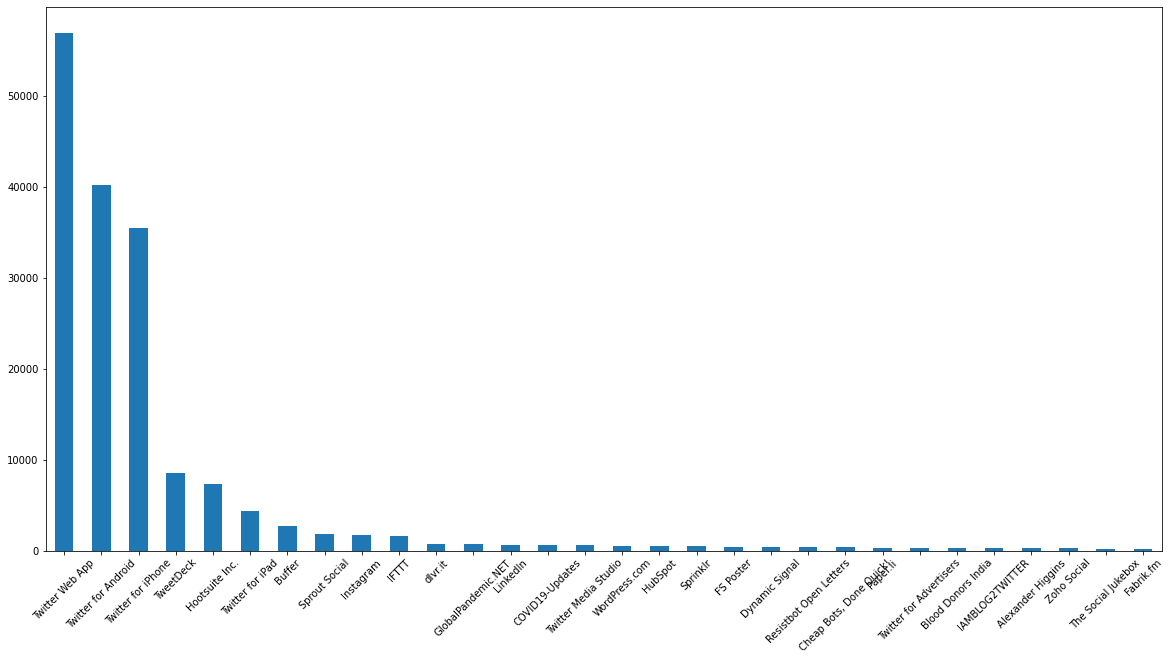

In [57]:
# Plot the top value_counts
plt.figure(figsize=(20,10))
df['source'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [58]:
!pip install neattext

In [59]:
# Load Text Cleaning Package
import neattext.functions as nfx

In [60]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [61]:
df['text'].iloc[2]

'@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3'

Noise

*  remove hashtags
*  List remove mentions/userhandles
*  urls
*  emojis
*  special chariter



In [62]:
df.head()

user_name         user_location  ...               source is_retweet
0           ᏉᎥ☻լꂅϮ            astroworld  ...   Twitter for iPhone      False
1    Tom Basile 🇺🇸          New York, NY  ...  Twitter for Android      False
2  Time4fisticuffs      Pewee Valley, KY  ...  Twitter for Android      False
3      ethel mertz  Stuck in the Middle   ...   Twitter for iPhone      False
4         DIPR-J&K     Jammu and Kashmir  ...  Twitter for Android      False

[5 rows x 13 columns]

In [63]:
df['text'].apply(nfx.extract_hashtags)


0                                      []
1                                      []
2                              [#COVID19]
3                              [#COVID19]
4         [#CoronaVirusUpdates, #COVID19]
                       ...               
179103                       [#WearAMask]
179104                         [#COVID19]
179105                                 []
179106                         [#COVID19]
179107                                 []
Name: text, Length: 179108, dtype: object

In [64]:
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [65]:
df[['extracted_hashtags','hashtags']]

extracted_hashtags                           hashtags
0                                    []                                NaN
1                                    []                                NaN
2                            [#COVID19]                        ['COVID19']
3                            [#COVID19]                        ['COVID19']
4       [#CoronaVirusUpdates, #COVID19]  ['CoronaVirusUpdates', 'COVID19']
...                                 ...                                ...
179103                     [#WearAMask]                      ['WearAMask']
179104                       [#COVID19]                        ['COVID19']
179105                               []                                NaN
179106                       [#COVID19]                        ['COVID19']
179107                               []                                NaN

[179108 rows x 2 columns]

In [66]:
# Cleaning Text
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [67]:
df[['text','clean_tweet']]

text                                        clean_tweet
0       If I smelled the scent of hand sanitizers toda...  If I smelled the scent of hand sanitizers toda...
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...  Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...  @diane3443 @wdunlap @realDonaldTrump Trump nev...
3       @brookbanktv The one gift #COVID19 has give me...  @brookbanktv The one gift   has give me is an ...
4       25 July : Media Bulletin on Novel #CoronaVirus...  25 July : Media Bulletin on Novel     \n@kansa...
...                                                   ...                                                ...
179103  Thanks @IamOhmai for nominating me for the @WH...  Thanks @IamOhmai for nominating me for the @WH...
179104  2020! The year of insanity! Lol! #COVID19 http...  2020! The year of insanity! Lol!   https://t.c...
179105  @CTVNews A powerful painting by Juan Lucena. I...  @CTVNews A powerful painting by Juan Lucena. I...
179106  More than 1,200 students test positive for #CO...  More than 1,200 students test positive for   a...
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...  I stop when I see a Stop\n\n@SABCNews\n@Izinda...

[179108 rows x 2 columns]

In [68]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [69]:
df[['text','clean_tweet']]

text                                        clean_tweet
0       If I smelled the scent of hand sanitizers toda...  If I smelled the scent of hand sanitizers toda...
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...  Hey     and   - wouldn't it have made more sen...
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...        Trump never once claimed   was a hoax. W...
3       @brookbanktv The one gift #COVID19 has give me...    The one gift   has give me is an appreciatio...
4       25 July : Media Bulletin on Novel #CoronaVirus...  25 July : Media Bulletin on Novel     \n      ...
...                                                   ...                                                ...
179103  Thanks @IamOhmai for nominating me for the @WH...  Thanks   for nominating me for the     challen...
179104  2020! The year of insanity! Lol! #COVID19 http...  2020! The year of insanity! Lol!   https://t.c...
179105  @CTVNews A powerful painting by Juan Lucena. I...    A powerful painting by Juan Lucena. It's a t...
179106  More than 1,200 students test positive for #CO...  More than 1,200 students test positive for   a...
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...  I stop when I see a Stop\n\n \n \n \n \n \n \n...

[179108 rows x 2 columns]

In [70]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from \n      cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [71]:
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [72]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [73]:
# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [74]:
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [75]:
df[['text','clean_tweet']]

text                                        clean_tweet
0       If I smelled the scent of hand sanitizers toda...  If I smelled the scent of hand sanitizers toda...
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...  Hey and  wouldnt it have made more sense to ha...
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   Trump never once claimed was a hoax We all cl...
3       @brookbanktv The one gift #COVID19 has give me...   The one gift has give me is an appreciation f...
4       25 July : Media Bulletin on Novel #CoronaVirus...                 25 July : Media Bulletin on Novel 
...                                                   ...                                                ...
179103  Thanks @IamOhmai for nominating me for the @WH...  Thanks for nominating me for the challenge I n...
179104  2020! The year of insanity! Lol! #COVID19 http...                     2020 The year of insanity Lol 
179105  @CTVNews A powerful painting by Juan Lucena. I...   A powerful painting by Juan Lucena Its a trib...
179106  More than 1,200 students test positive for #CO...  More than 1200 students test positive for at m...
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...                          I stop when I see a Stop 

[179108 rows x 2 columns]

In [78]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_emojis)

In [79]:
df[['text','clean_tweet']]


text                                        clean_tweet
0       If I smelled the scent of hand sanitizers toda...  If I smelled the scent of hand sanitizers toda...
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...  Hey and  wouldnt it have made more sense to ha...
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   Trump never once claimed was a hoax We all cl...
3       @brookbanktv The one gift #COVID19 has give me...   The one gift has give me is an appreciation f...
4       25 July : Media Bulletin on Novel #CoronaVirus...                 25 July : Media Bulletin on Novel 
...                                                   ...                                                ...
179103  Thanks @IamOhmai for nominating me for the @WH...  Thanks for nominating me for the challenge I n...
179104  2020! The year of insanity! Lol! #COVID19 http...                     2020 The year of insanity Lol 
179105  @CTVNews A powerful painting by Juan Lucena. I...   A powerful painting by Juan Lucena Its a trib...
179106  More than 1,200 students test positive for #CO...  More than 1200 students test positive for at m...
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...                          I stop when I see a Stop 

[179108 rows x 2 columns]

In [81]:
# Step - a : Remove blank rows if any.
df['clean_tweet'].dropna(inplace=True)


In [82]:
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
df['clean_tweet'] = [entry.lower() for entry in df['clean_tweet']]

In [83]:
df[['text','clean_tweet']]

text                                        clean_tweet
0       If I smelled the scent of hand sanitizers toda...  if i smelled the scent of hand sanitizers toda...
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...  hey and  wouldnt it have made more sense to ha...
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   trump never once claimed was a hoax we all cl...
3       @brookbanktv The one gift #COVID19 has give me...   the one gift has give me is an appreciation f...
4       25 July : Media Bulletin on Novel #CoronaVirus...                 25 july : media bulletin on novel 
...                                                   ...                                                ...
179103  Thanks @IamOhmai for nominating me for the @WH...  thanks for nominating me for the challenge i n...
179104  2020! The year of insanity! Lol! #COVID19 http...                     2020 the year of insanity lol 
179105  @CTVNews A powerful painting by Juan Lucena. I...   a powerful painting by juan lucena its a trib...
179106  More than 1,200 students test positive for #CO...  more than 1200 students test positive for at m...
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...                          i stop when i see a stop 

[179108 rows x 2 columns]

Sentiment Analysis

In [84]:
from textblob import TextBlob

In [85]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [86]:
# Text
ex1 = df['clean_tweet'].iloc[0]

In [87]:
get_sentiment(ex1)

{'polarity': -0.25, 'sentiment': 'Negative', 'subjectivity': 0.25}

In [88]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [89]:
df['sentiment_results']

0         {'polarity': -0.25, 'subjectivity': 0.25, 'sen...
1         {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...
2         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3         {'polarity': 0.0, 'subjectivity': 0.3571428571...
4         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                                ...                        
179103    {'polarity': 0.2, 'subjectivity': 0.2, 'sentim...
179104    {'polarity': 0.8, 'subjectivity': 0.7, 'sentim...
179105    {'polarity': 0.3, 'subjectivity': 1.0, 'sentim...
179106    {'polarity': 0.26325757575757575, 'subjectivit...
179107    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 179108, dtype: object

In [90]:
df['sentiment_results'].iloc[0]

{'polarity': -0.25, 'sentiment': 'Negative', 'subjectivity': 0.25}

In [91]:
pd.json_normalize(df['sentiment_results'].iloc[0])

polarity  subjectivity sentiment
0     -0.25          0.25  Negative

In [92]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [93]:
df.head()

user_name         user_location  ... subjectivity sentiment
0           ᏉᎥ☻լꂅϮ            astroworld  ...     0.250000  Negative
1    Tom Basile 🇺🇸          New York, NY  ...     0.500000  Positive
2  Time4fisticuffs      Pewee Valley, KY  ...     0.000000   Neutral
3      ethel mertz  Stuck in the Middle   ...     0.357143   Neutral
4         DIPR-J&K     Jammu and Kashmir  ...     0.000000   Neutral

[5 rows x 19 columns]

In [94]:
df['sentiment'].value_counts()

Neutral     75260
Positive    74340
Negative    29508
Name: sentiment, dtype: int64

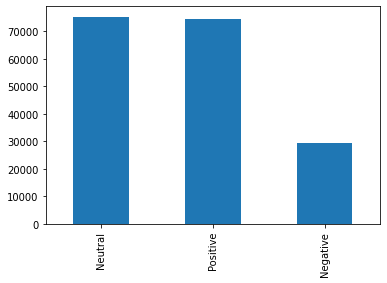

In [95]:
df['sentiment'].value_counts().plot(kind='bar')

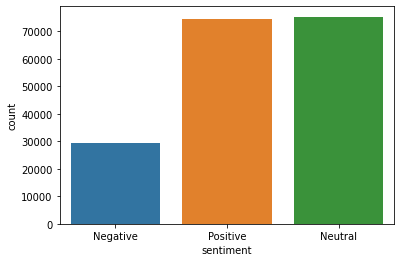

In [96]:
# Plot with seaborn
sns.countplot(df['sentiment'])

In [ ]:
### Keyword Extraction
+ For Positive and Negative Sentiment
+ General

In [97]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']

In [98]:
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [99]:
positive_tweet

1         hey and  wouldnt it have made more sense to ha...
6         how will change work in general (and recruitin...
8                 praying for good health and recovery of  
12         — no one will be safe from until everyone is ...
13        lets all protect ourselves from its real and t...
                                ...                        
179096    we were really bummed we couldn’t cop one of t...
179103    thanks for nominating me for the challenge i n...
179104                       2020 the year of insanity lol 
179105     a powerful painting by juan lucena its a trib...
179106    more than 1200 students test positive for at m...
Name: clean_tweet, Length: 74340, dtype: object

In [100]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [101]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [102]:
positive_tweet_list 


['hey wouldnt sense players pay respects a…',
 'change work general (and recruiting specifically) via/',
 'praying good health recovery',
 '— safe safe commit ensure…',
 'lets protect real numbers climbing fast continent lets n…',
 'second wave flandersback',
 'covid update: infection rate florida following natural curve experts predicted initial cu…',
 'good patriots volunteer election judge polls open without…',
 'comprehensive review amp analysis: key ways wash help reduce transmission…',
 'crosses 2 lakh mark 150055 ppp recovered far positive today 6988/total…',
 'actor father mrgkreddy tested positive 15/20 days s…',
 'safe place visit guests said hotel meticulous applying hand sanitation als…',
 'ceo live wsu talking “the effects covid19 students”…',
 'actionables healthy recovery',
 'understood hadnt missed meeting in…',
 'released new podcast episodes week: technology platforms conduct telehealth visits c…',
 'reports 1142 positive cases 29 deaths saturday death toll rises 3806

In [103]:
# Tokenization
for line in positive_tweet_list:
#     print(line)
    for token in line.split():
        print(token)

Streaming output truncated to the last 5000 lines.
people
homeless
starving
and…
hypocrisy
article
astounding
bbc
suggesting
it’s
time
5
months
peddling
antito…
ipo
market
impacted
q2
explore
newly
released
ipo
insights
q2
2020
report
kpmg
p…
antifacemasker
believes
fascists
+
demagogues
like
icke
nhs
staff
care
wkers
+
fams
whove
lost
loved
on…
countries
restrict
movement
stop
face
new
realities
including
isolation
particularly…
countries
restrict
movement
stop
face
new
realities
including
isolation
particularly…
especially
it’s
easy
feel
highly
stressed
overwhelmed
mental
exercises
like
redirecting
t…
it’s
long
day
worth
192708
confirmed
cases
worldwide
saturday
august
29th
2020
5:00:00
pm
+3151
cases
confirmed
hour
ago
fun
amp
delicious…we
want
sure
doesn’t
hurt
log
run
lab
analytics…
6955
covid19
tests
carried
29
august
2020
278
new
cases
detected
111
expatriate
wor…
quarantined
sweatshirts
available
different
colors
link
bio
hong
kongs
fire
eye
laboratory
ready
support
largescale


In [104]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]

In [105]:
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [106]:
pos_tokens

['hey',
 'wouldnt',
 'sense',
 'players',
 'pay',
 'respects',
 'a…',
 'change',
 'work',
 'general',
 '(and',
 'recruiting',
 'specifically)',
 'via/',
 'praying',
 'good',
 'health',
 'recovery',
 '—',
 'safe',
 'safe',
 'commit',
 'ensure…',
 'lets',
 'protect',
 'real',
 'numbers',
 'climbing',
 'fast',
 'continent',
 'lets',
 'n…',
 'second',
 'wave',
 'flandersback',
 'covid',
 'update:',
 'infection',
 'rate',
 'florida',
 'following',
 'natural',
 'curve',
 'experts',
 'predicted',
 'initial',
 'cu…',
 'good',
 'patriots',
 'volunteer',
 'election',
 'judge',
 'polls',
 'open',
 'without…',
 'comprehensive',
 'review',
 'amp',
 'analysis:',
 'key',
 'ways',
 'wash',
 'help',
 'reduce',
 'transmission…',
 'crosses',
 '2',
 'lakh',
 'mark',
 '150055',
 'ppp',
 'recovered',
 'far',
 'positive',
 'today',
 '6988/total…',
 'actor',
 'father',
 'mrgkreddy',
 'tested',
 'positive',
 '15/20',
 'days',
 's…',
 'safe',
 'place',
 'visit',
 'guests',
 'said',
 'hotel',
 'meticulous',
 'ap

In [107]:
# Get Most Commonest Keywords
from collections import Counter

In [108]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [109]:
get_tokens(pos_tokens)

{'24': 1380,
 'amp': 5315,
 'cases': 11058,
 'confirmed': 2068,
 'coronavirus': 2064,
 'covid19': 3832,
 'day': 1616,
 'deaths': 3645,
 'good': 2317,
 'great': 1679,
 'health': 1996,
 'latest': 1863,
 'like': 1576,
 'need': 1531,
 'new': 13575,
 'number': 1356,
 'pandemic': 2308,
 'people': 3994,
 'positive': 4350,
 'reported': 1822,
 'reports': 1374,
 'right': 1467,
 'safe': 1920,
 'social': 1432,
 'tested': 1493,
 'time': 1572,
 'today': 2111,
 'total': 3085,
 'vaccine': 1345,
 '|': 1456}

In [110]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [111]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [112]:
neg_df

words  scores
0         cases    2560
1        people    2041
2           amp    2040
3       covid19    1113
4      pandemic    1104
5           new     990
6          help     948
7        spread     890
8        active     851
9          like     817
10        daily     802
11       deaths     782
12         slow     755
13       health     752
14         risk     733
15          day     696
16         long     631
17         dead     629
18     symptoms     626
19         time     613
20        covid     594
21        virus     577
22           y…     551
23         know     549
24         hard     542
25         mask     539
26  coronavirus     537
27          bad     536
28     identify     536
29       sooner     530

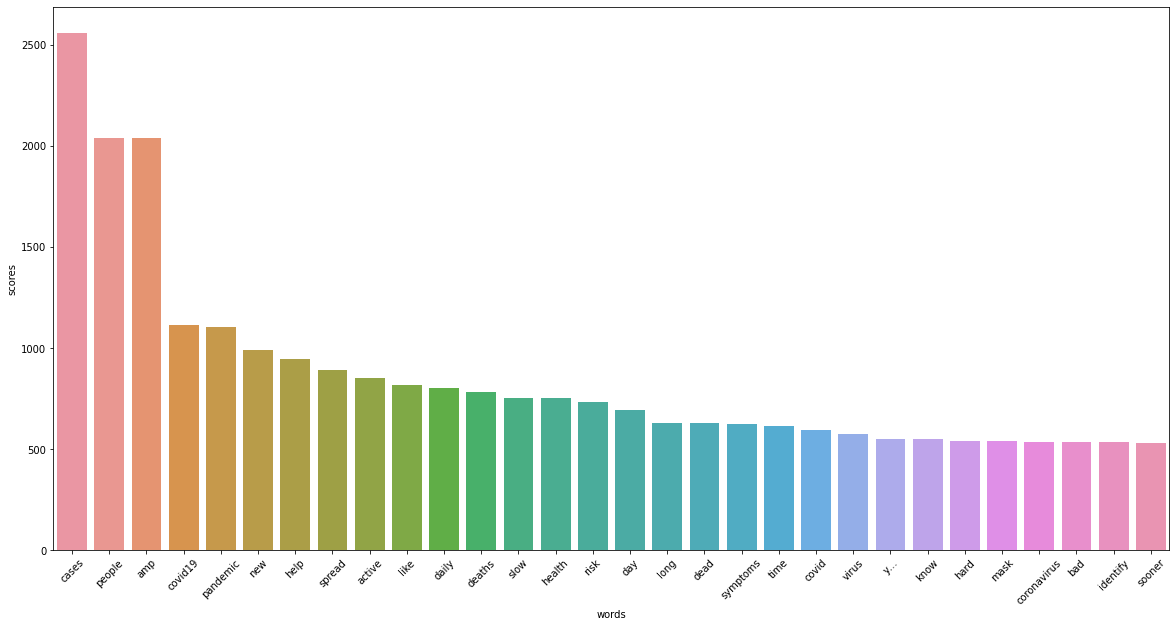

In [113]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

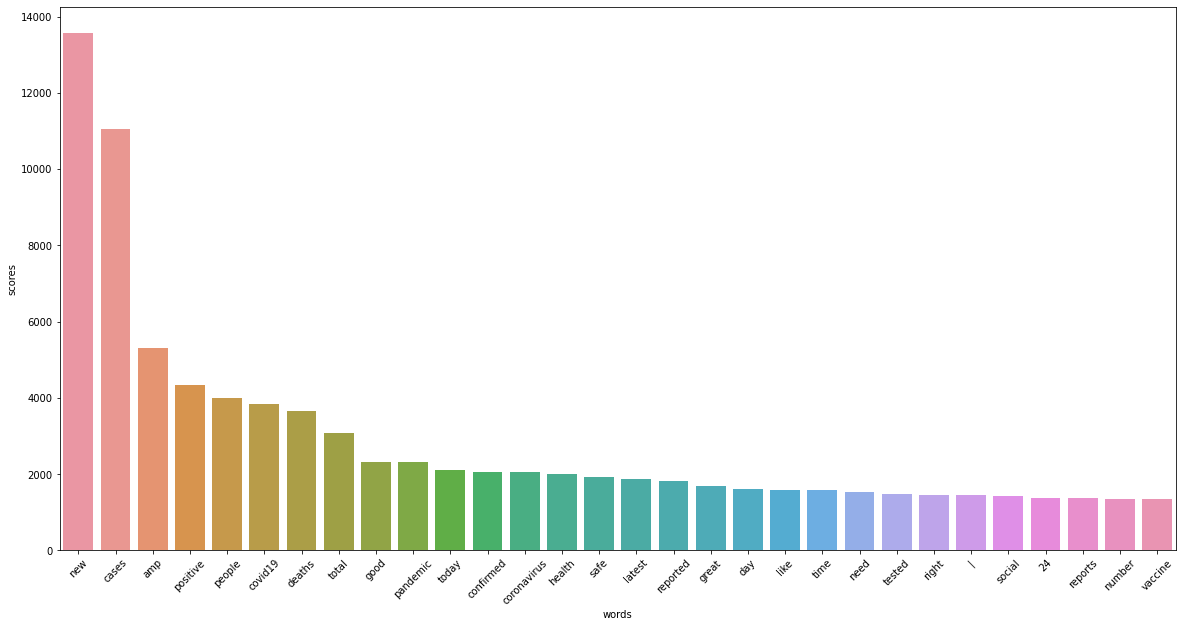

In [114]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

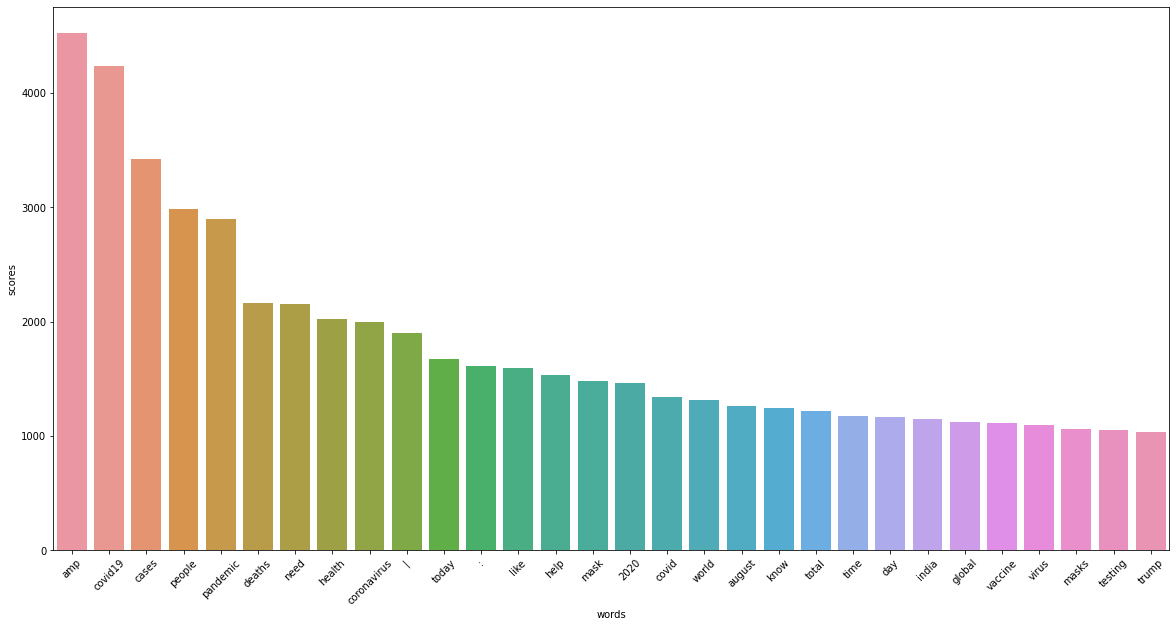

In [115]:
# Plot with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

In [116]:
### Word Cloud
from wordcloud import WordCloud

In [117]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [118]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

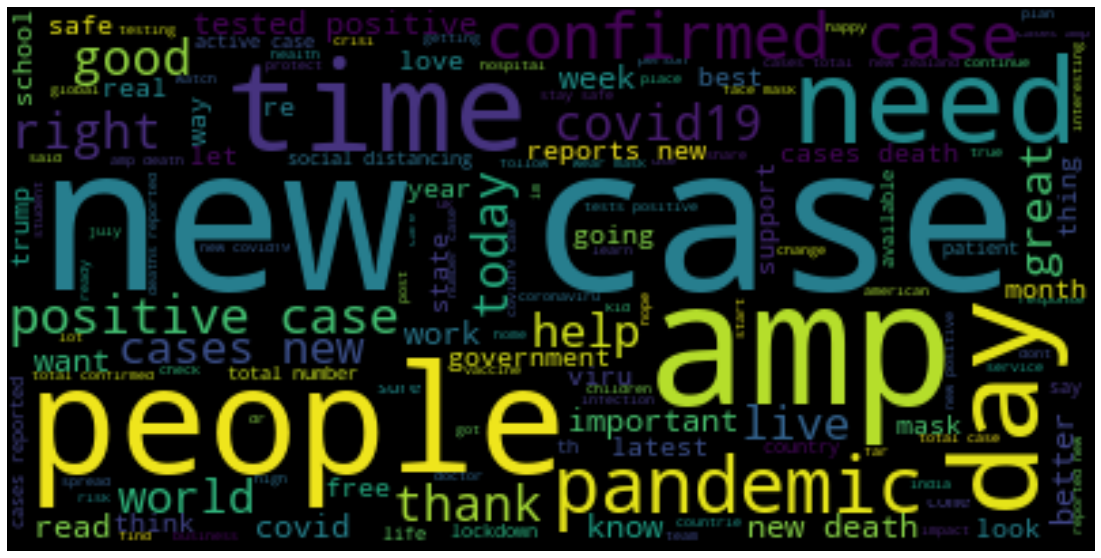

In [119]:
plot_wordcloud(pos_docx)

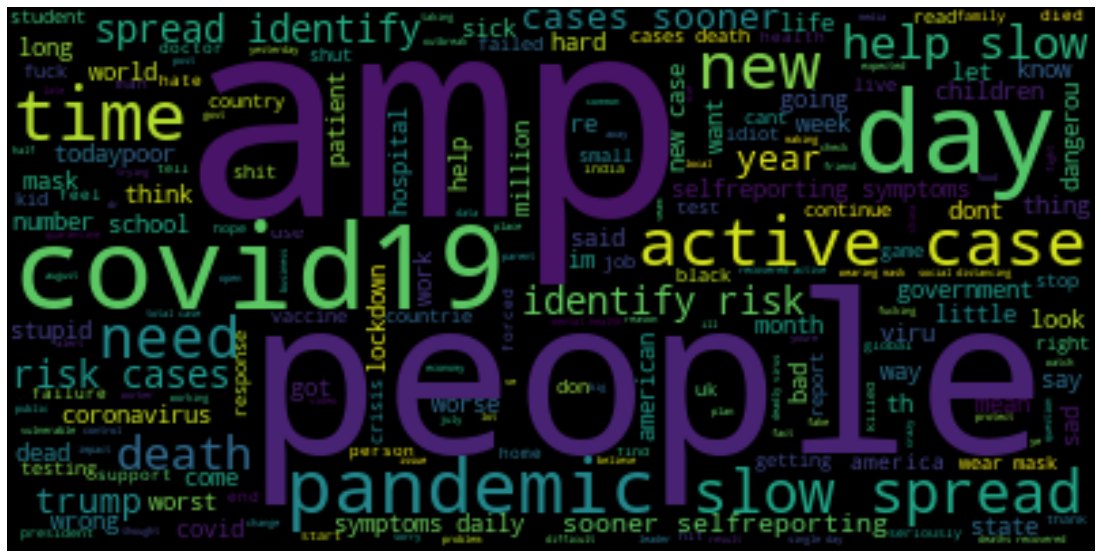

In [121]:
plot_wordcloud(neg_docx)

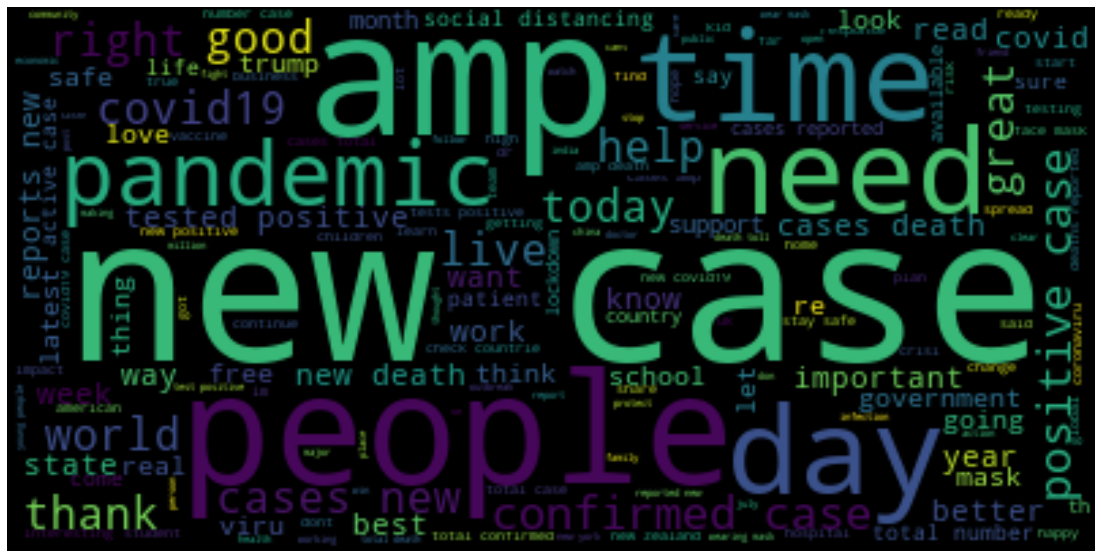

In [122]:
plot_wordcloud(pos_docx)

In [124]:
new_df = df[['clean_tweet','sentiment']]

In [125]:
new_df.head()


clean_tweet sentiment
0  if i smelled the scent of hand sanitizers toda...  Negative
1  hey and  wouldnt it have made more sense to ha...  Positive
2   trump never once claimed was a hoax we all cl...   Neutral
3   the one gift has give me is an appreciation f...   Neutral
4                 25 july : media bulletin on novel    Neutral

In [126]:
new_df.shape

(179108, 2)

In [127]:
new_df.isnull().sum()

clean_tweet    0
sentiment      0
dtype: int64

In [128]:
new_df.head(7)

clean_tweet sentiment
0  if i smelled the scent of hand sanitizers toda...  Negative
1  hey and  wouldnt it have made more sense to ha...  Positive
2   trump never once claimed was a hoax we all cl...   Neutral
3   the one gift has give me is an appreciation f...   Neutral
4                 25 july : media bulletin on novel    Neutral
5   deaths continue to rise its almost as bad as ...  Negative
6  how will change work in general (and recruitin...  Positive

Spitting Our Dataset into Training And Testing Dataset ( For Multiclass Classification)

In [129]:
from sklearn.model_selection import train_test_split

In [131]:


train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)


train shape :  (143286, 2)
valid shape :  (35822, 2)


Use Of Counter Vectorizer For Multi Class Classification

---



In [132]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


In [ ]:
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

Naive Bayes Classifier for MULTICLASS Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

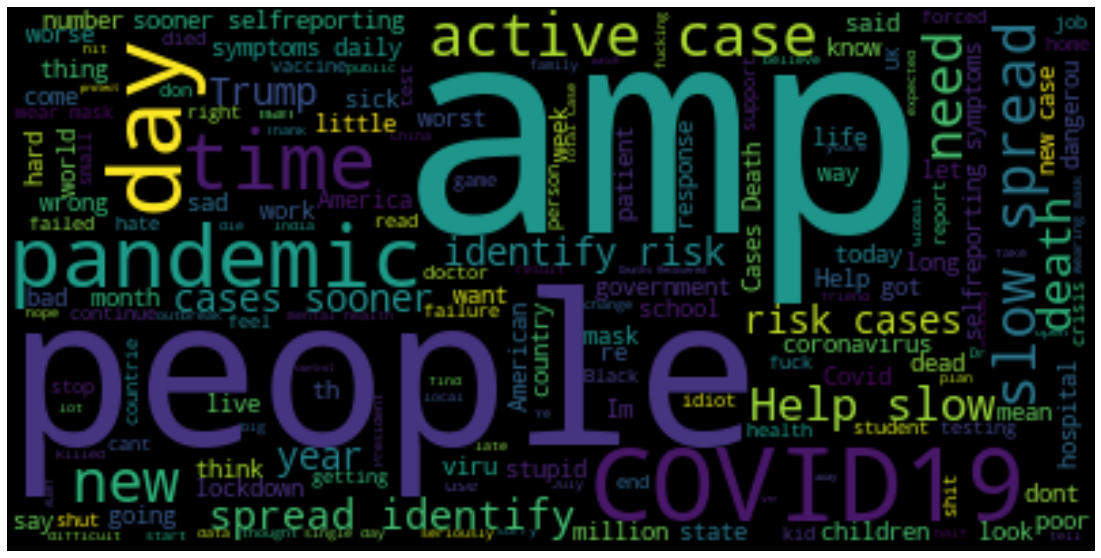

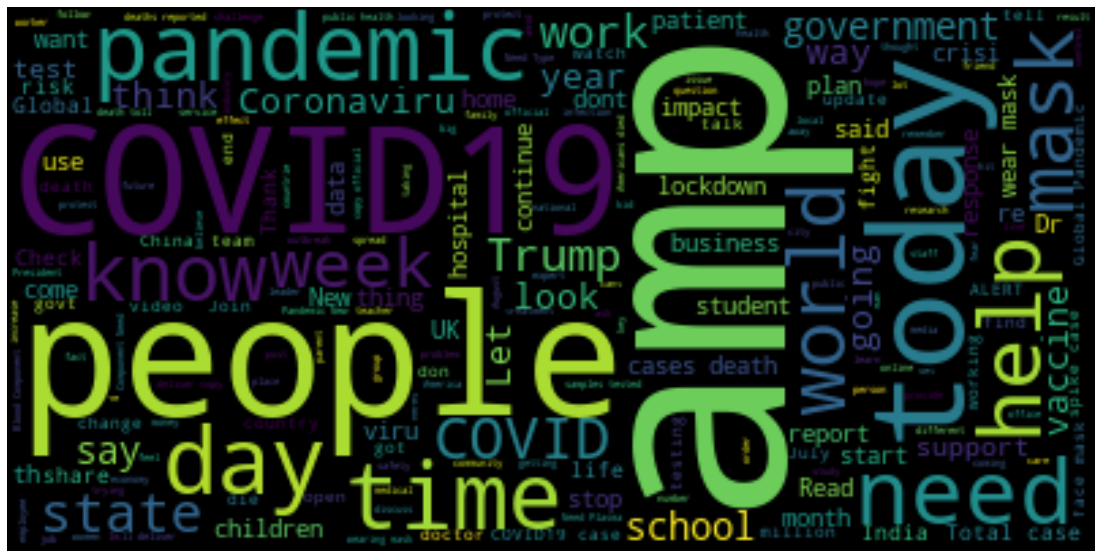

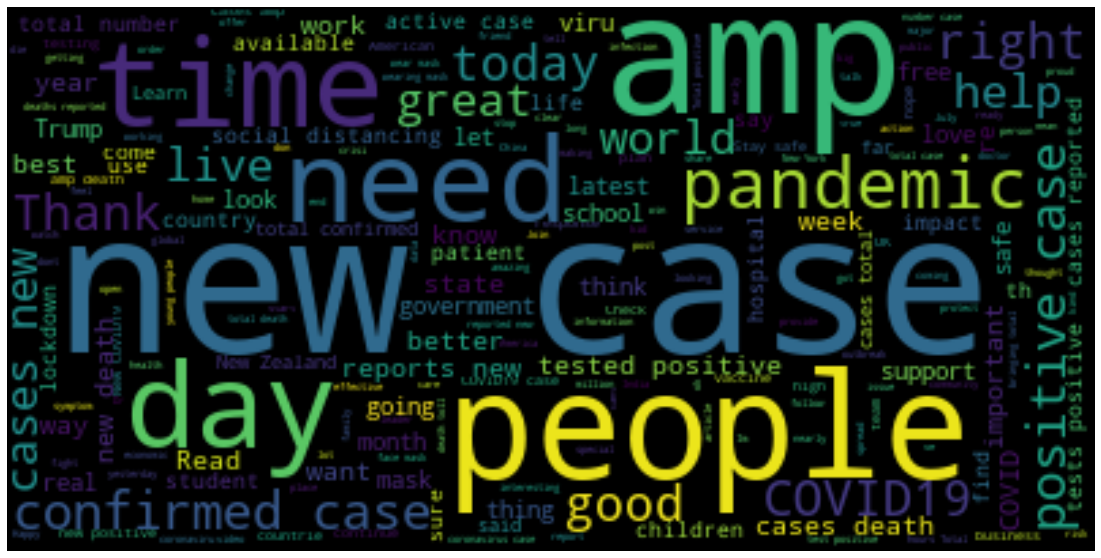